<a href="https://colab.research.google.com/github/SzupanBurliga/DigitalSignalProcessing/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zad 1 DTF sygnału harmonicznego

1 Rekonstrukcja sygnału z błędem: 483.78768082281977
2 Rekonstrukcja sygnału z błędem: 8.540020264605375e-14
Różnica w rekonstrukcjach sygnału: 1.76524136581581e-16


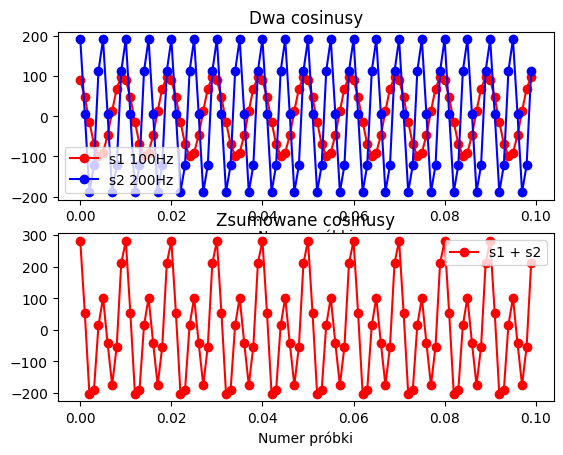

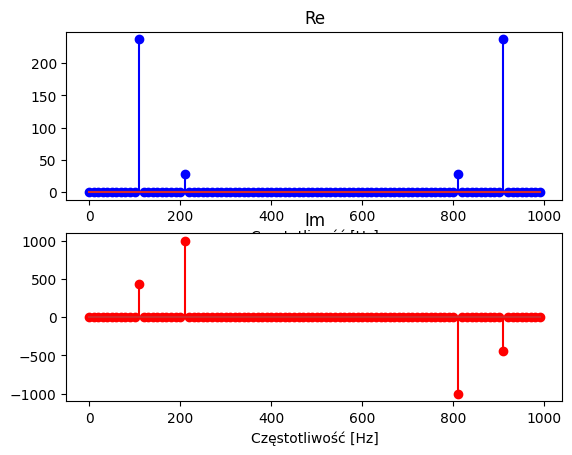

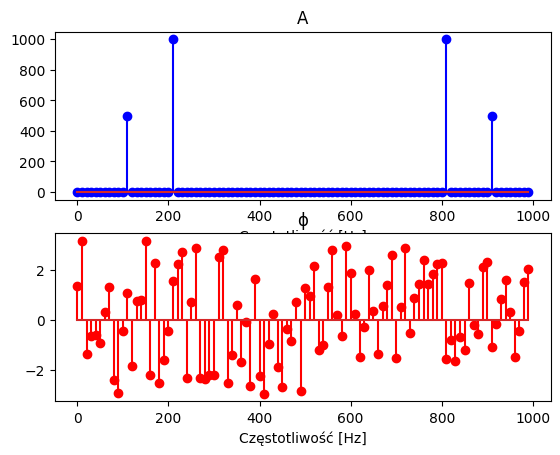

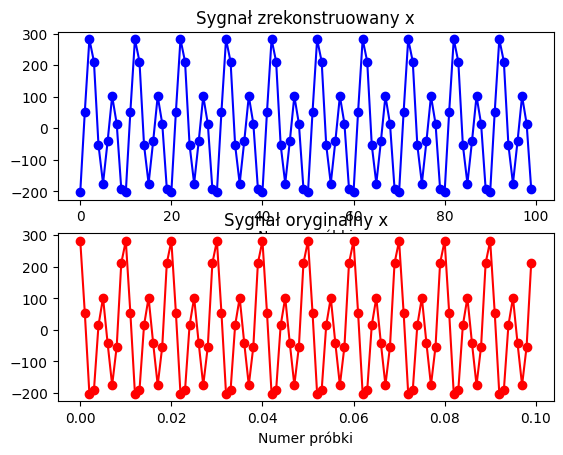

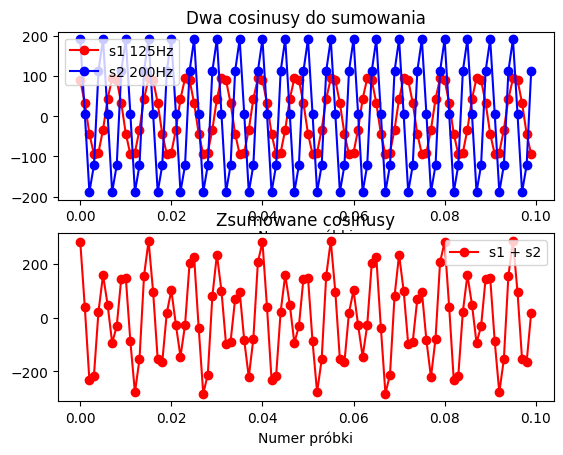

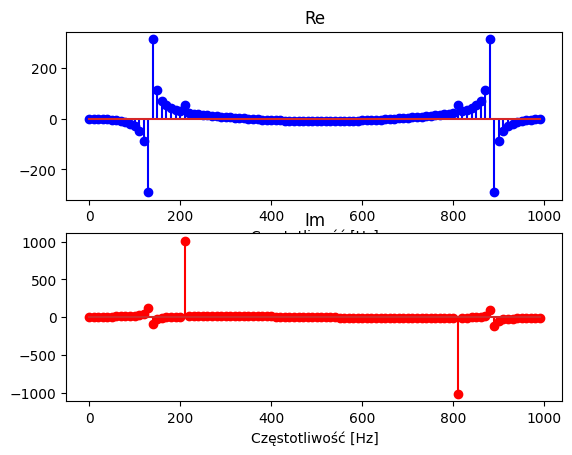

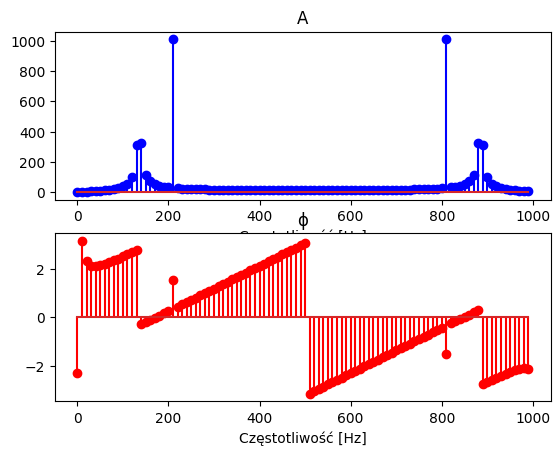

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
N = 100  # liczba probek
fs = 1000  # czestotliwosc probkowania
st = 1 / fs  # krok próbkowania
T = 0.1  # czas trwania probkowania (100 probek dla 1000Hz = 0.1s)

sample = np.arange(0, T, st)  # przedział czasowy próbkowania

# Częstotliwości
f1 = 100
f2 = 200

# Amplitudy
A1 = 100
A2 = 200

# Kąty fazowe
p1 = np.pi / 7
p2 = np.pi / 11

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.cos(2 * np.pi * f1 * t + p1)
s2 = lambda t: A2 * np.cos(2 * np.pi * f2 * t + p2)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample)

plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(sample, s1(sample), 'r-o')
plt.plot(sample, s2(sample), 'b-o')
plt.title('Dwa cosinusy')
plt.legend(['s1 100Hz', 's2 200Hz'])
plt.xlabel('Numer próbki')

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Zsumowane cosinusy')
plt.legend(['s1 + s2'])
plt.xlabel('Numer próbki')

# Generowanie macierzy A - macierzy transformacji DFT
# W = exp(1j*2*np.pi/N)
A = np.zeros((N, N), dtype=np.complex128)

for k in range(N):
    for n in range(N):
        A[k, n] = (1 / np.sqrt(N)) * (np.exp(1j * 2 * np.pi / N)) ** (-(k-1)*(n-1))

# Dyskretna transformata Fouriera - DFT
X = np.dot(A, x)

# Rysowanie widma y sygnału x
XRe = np.real(X)  # część rzeczywista
XIm = np.imag(X)  # część urojona
XA = np.abs(X)    # moduł
XP = np.angle(X)  # faza

# Skalowanie osi częstotliwości w Herzach
f = np.arange(0, N) * fs / N

plt.figure(3)
plt.subplot(2, 1, 1)
plt.stem(f, XRe, 'b-o')
plt.title('Re')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.stem(f, XIm, 'r-o')
plt.title('Im')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(4)
plt.subplot(2, 1, 1)
plt.stem(f, XA, 'b-o')
plt.title('A')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.stem(f, XP, 'r-o')
plt.title('ϕ')
plt.xlabel('Częstotliwość [Hz]')

# Wyznaczanie B - macierzy rekonstrukcji macierzy A
B = np.transpose(A)
xrcnst = np.dot(B, X)

plt.figure(5)
plt.subplot(2, 1, 1)
plt.plot(np.real(xrcnst), 'b-o')
plt.title('Sygnał zrekonstruowany x')
plt.xlabel('Numer próbki')

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Sygnał oryginalny x')
plt.xlabel('Numer próbki')

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol1 = np.max(np.abs(x - xrcnst))
print('1 Rekonstrukcja sygnału z błędem:', tol1)

# Zastąpienie operacji X = Ax przez X = np.fft.fft(x)
# Zastąpienie operacji Xrcnst = BX przez Xrcnst = np.fft.ifft(X)
X = np.fft.fft(x)
xrcnst = np.fft.ifft(X)

# Sprawdzenie czy transformata posiada
# właściwość perfekcyjnej rekonstrukcji
tol2 = np.max(np.abs(x - xrcnst))
print('2 Rekonstrukcja sygnału z błędem:', tol2)

print('Różnica w rekonstrukcjach sygnału:', tol2 / tol1)

# Zmiana f1 na 125Hz
f1 = 125
s1 = lambda t: A1 * np.cos(2 * np.pi * f1 * t + p1)
x = s1(sample) + s2(sample)

plt.figure(6)
plt.subplot(2, 1, 1)
plt.plot(sample, s1(sample), 'r-o')
plt.plot(sample, s2(sample), 'b-o')
plt.title('Dwa cosinusy do sumowania')
plt.legend(['s1 125Hz', 's2 200Hz'])
plt.xlabel('Numer próbki')

plt.subplot(2, 1, 2)
plt.plot(sample, x, 'r-o')
plt.title('Zsumowane cosinusy')
plt.legend(['s1 + s2'])
plt.xlabel('Numer próbki')

# Dyskretna transformata Fouriera - DFT
X = np.dot(A, x)

# Rysowanie widma y sygnału x
XRe = np.real(X)  # część rzeczywista
XIm = np.imag(X)  # część urojona
XA = np.abs(X)    # moduł
XP = np.angle(X)  # faza

# Skalowanie osi częstotliwości w Herzach
f = np.arange(0, N) * fs / N

plt.figure(7)
plt.subplot(2, 1, 1)
plt.stem(f, XRe, 'b-o')
plt.title('Re')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.stem(f, XIm, 'r-o')
plt.title('Im')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(8)
plt.subplot(2, 1, 1)
plt.stem(f, XA, 'b-o')
plt.title('A')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.stem(f, XP, 'r-o')
plt.title('ϕ')
plt.xlabel('Częstotliwość [Hz]')

plt.show()

Zad 2 DTfT

<ipython-input-10-8c4babc2eef2>:37: ComplexWarning: Casting complex values to real discards the imaginary part
  X_3[i] += x_t[n] * np.exp(-1j * 2*np.pi * n * f / fs)


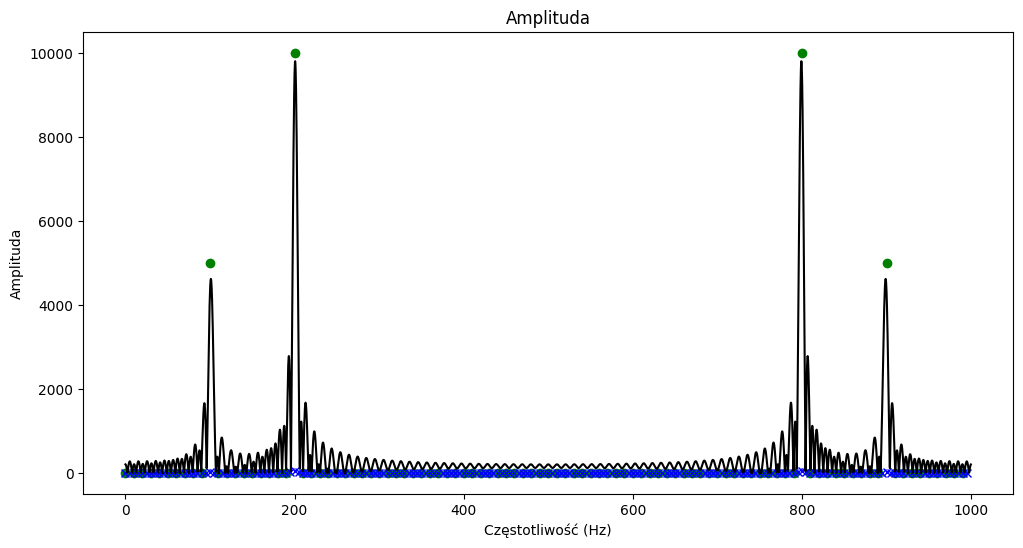

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N = 100
W_N = np.exp(1j * 2 * np.pi / N)

A = np.ones((N, N), dtype=complex) / np.sqrt(N)
for k in range(N):
    for n in range(N):
        A[k, n] = W_N ** (-k * n)

fs = 1000
t = np.arange(N) / fs
f1 = 100
f2 = 200
A1 = 100
A2 = 200
phi1 = np.pi / 7
phi2 = np.pi / 11

x_t = A1 * np.cos(2 * np.pi * f1 * t + phi1) + A2 * np.cos(2 * np.pi * f2 * t + phi2)

X = A.dot(x_t)
X_1 = X
m_zeros = np.zeros(100)
M = len(m_zeros)
x_z = np.append(x_t, m_zeros)

X_2 = np.fft.fft(x_z)/(N+M)

x_f = np.arange(0, 1000, 0.25)
X_3 = np.zeros_like(x_f)

for i, f in enumerate(x_f):
    for n in np.arange(0, N-1, 1):
        X_3[i] += x_t[n] * np.exp(-1j * 2*np.pi * n * f / fs)

frequency_axis = np.linspace(0, fs, N, endpoint=False)
magnitude = np.abs(X_1)

fig = plt.figure(figsize=(12, 6))

plt.plot(frequency_axis, magnitude, "go")
plt.title('Amplituda')
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

frequency_axis = np.linspace(0, fs, N+M, endpoint=False)
magnitude = np.abs(X_2)

plt.plot(frequency_axis, magnitude, "bx")

frequency_axis = np.linspace(0, fs, len(x_f), endpoint=False)
magnitude = np.abs(X_3)

plt.plot(frequency_axis, magnitude, "k-")
plt.show()


Zad 3  DtFT, rola funkcji okien i liczby próbek

<ipython-input-16-acc205081a20>:89: ComplexWarning: Casting complex values to real discards the imaginary part
  Xbox[fre] += (1/N) * xbox[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
<ipython-input-16-acc205081a20>:90: ComplexWarning: Casting complex values to real discards the imaginary part
  Xham[fre] += (1/N) * xham[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
<ipython-input-16-acc205081a20>:91: ComplexWarning: Casting complex values to real discards the imaginary part
  Xbla[fre] += (1/N) * xbla[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
<ipython-input-16-acc205081a20>:92: ComplexWarning: Casting complex values to real discards the imaginary part
  Xche[fre] += (1/N) * xche[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
<ipython-input-16-acc205081a20>:93: ComplexWarning: Casting complex values to real discards the imaginary part
  Xche2[fre] += (1/N) * xche2[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)


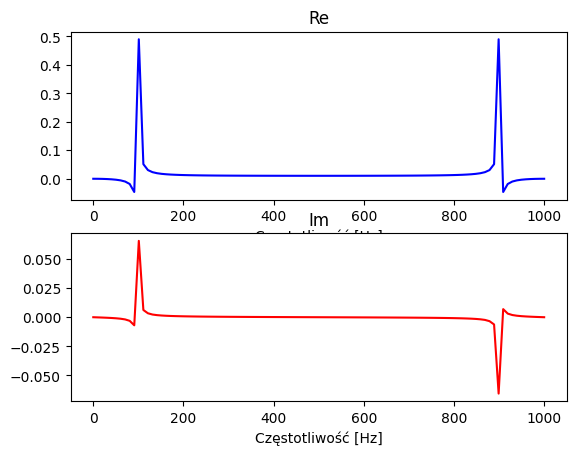

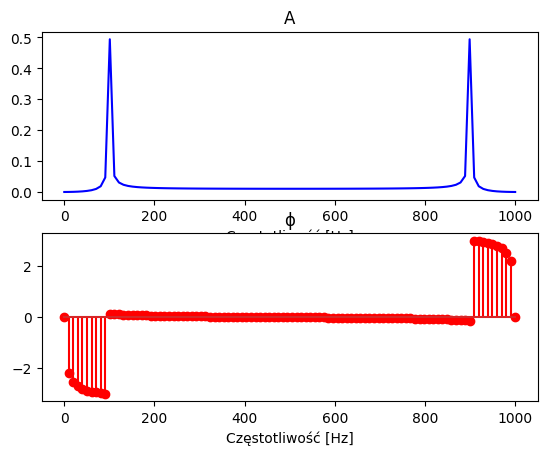

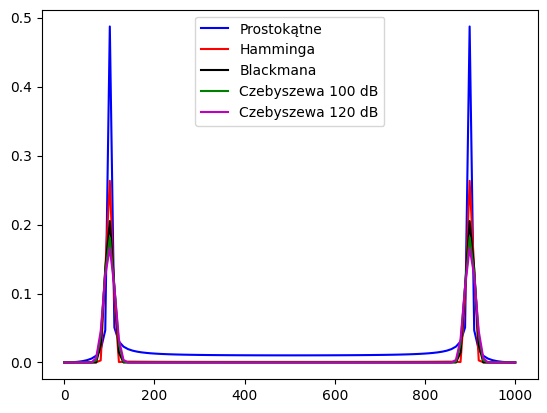

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

# Dane
N = 100  # liczba probek
fs = 1000  # czestotliwosc probkowania
st = 1/fs  # krok próbkowania
T = 0.1  # czas trwania probkowania (100 probek dla 1000Hz = 0.1s)

sample = np.arange(0, T, st)  # przedział czasowy próbkowania

# Częstotliwości
f1 = 100
f2 = 125

# Amplitudy
A1 = 1
A2 = 0.0001

# Kąty fazowe
p1 = (np.pi/7)
p2 = (np.pi/11)

# Tworzenie sygnału z sumy sinusów
s1 = lambda t: A1 * np.cos(2*np.pi*f1*t + p1)
s2 = lambda t: A2 * np.cos(2*np.pi*f2*t + p2)

# Sygnał x z sumy sinusów
x = s1(sample) + s2(sample)

# Obliczanie DtFT
f = np.linspace(0, fs, N)
X = np.zeros(len(f), dtype=complex)

for fi in range(len(f)):
    for n in range(N):
        X[fi] += x[n] * np.exp(-1j*2*np.pi*f[fi]*n/fs)
X /= N

# Rysowanie widma y sygnału x
XRe = X.real  # część rzeczywista
XIm = X.imag  # część urojona
XA = np.abs(X)  # moduł
XP = np.angle(X)  # faza

# Skalowanie osi częstotliwości w Herzach

plt.figure(4)
plt.subplot(2, 1, 1)
plt.plot(f, XRe, 'b-')
plt.title('Re')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.plot(f, XIm, 'r-')
plt.title('Im')
plt.xlabel('Częstotliwość [Hz]')

plt.figure(5)
plt.subplot(2, 1, 1)
plt.plot(f, XA, 'b-')
plt.title('A')
plt.xlabel('Częstotliwość [Hz]')

plt.subplot(2, 1, 2)
plt.stem(f, XP, 'r-')
plt.title('ϕ')
plt.xlabel('Częstotliwość [Hz]')

# Okna
xbox = np.multiply(np.sinc(sample), x)
Xbox = np.zeros(len(f))

xham = np.multiply(np.hamming(N), x)
Xham = np.zeros(len(f))

xbla = np.multiply(np.blackman(N), x)
Xbla = np.zeros(len(f))

xche = np.multiply(windows.chebwin(N, 100), x)
Xche = np.zeros(len(f))

xche2 = np.multiply(windows.chebwin(N, 120), x)
Xche2 = np.zeros(len(f))

for fre in range(len(f)):
    for j in range(N):
        Xbox[fre] += (1/N) * xbox[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
        Xham[fre] += (1/N) * xham[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
        Xbla[fre] += (1/N) * xbla[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
        Xche[fre] += (1/N) * xche[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)
        Xche2[fre] += (1/N) * xche2[j] * np.exp(-1j*2*np.pi*f[fre]*j/fs)

plt.figure(6)
plt.plot(f, np.abs(Xbox), "b-", f, np.abs(Xham), "r-", f, np.abs(Xbla), "k-", f, np.abs(Xche), "g-", f, np.abs(Xche2), "m-")
plt.legend(['Prostokątne', 'Hamminga', 'Blackmana', 'Czebyszewa 100 dB', 'Czebyszewa 120 dB'])

# # Wykresy okien
# plt.figure(7)
# plt.title('Okna')
# plt.plot(f, np.sinc(sample), 'b-')
# plt.plot(f, np.hamming(N), 'r-')
# plt.plot(f, np.blackman(N), 'k-')
# plt.plot(f, windows.chebwin(N, 100), 'g-')
# plt.plot(f, windows.chebwin(N, 120), 'm-')
# plt.legend(['Prostokątne', 'Hamminga', 'Blackmana', 'Czebyszewa 100', 'Czebyszewa 120'])

plt.show()


Zad 4

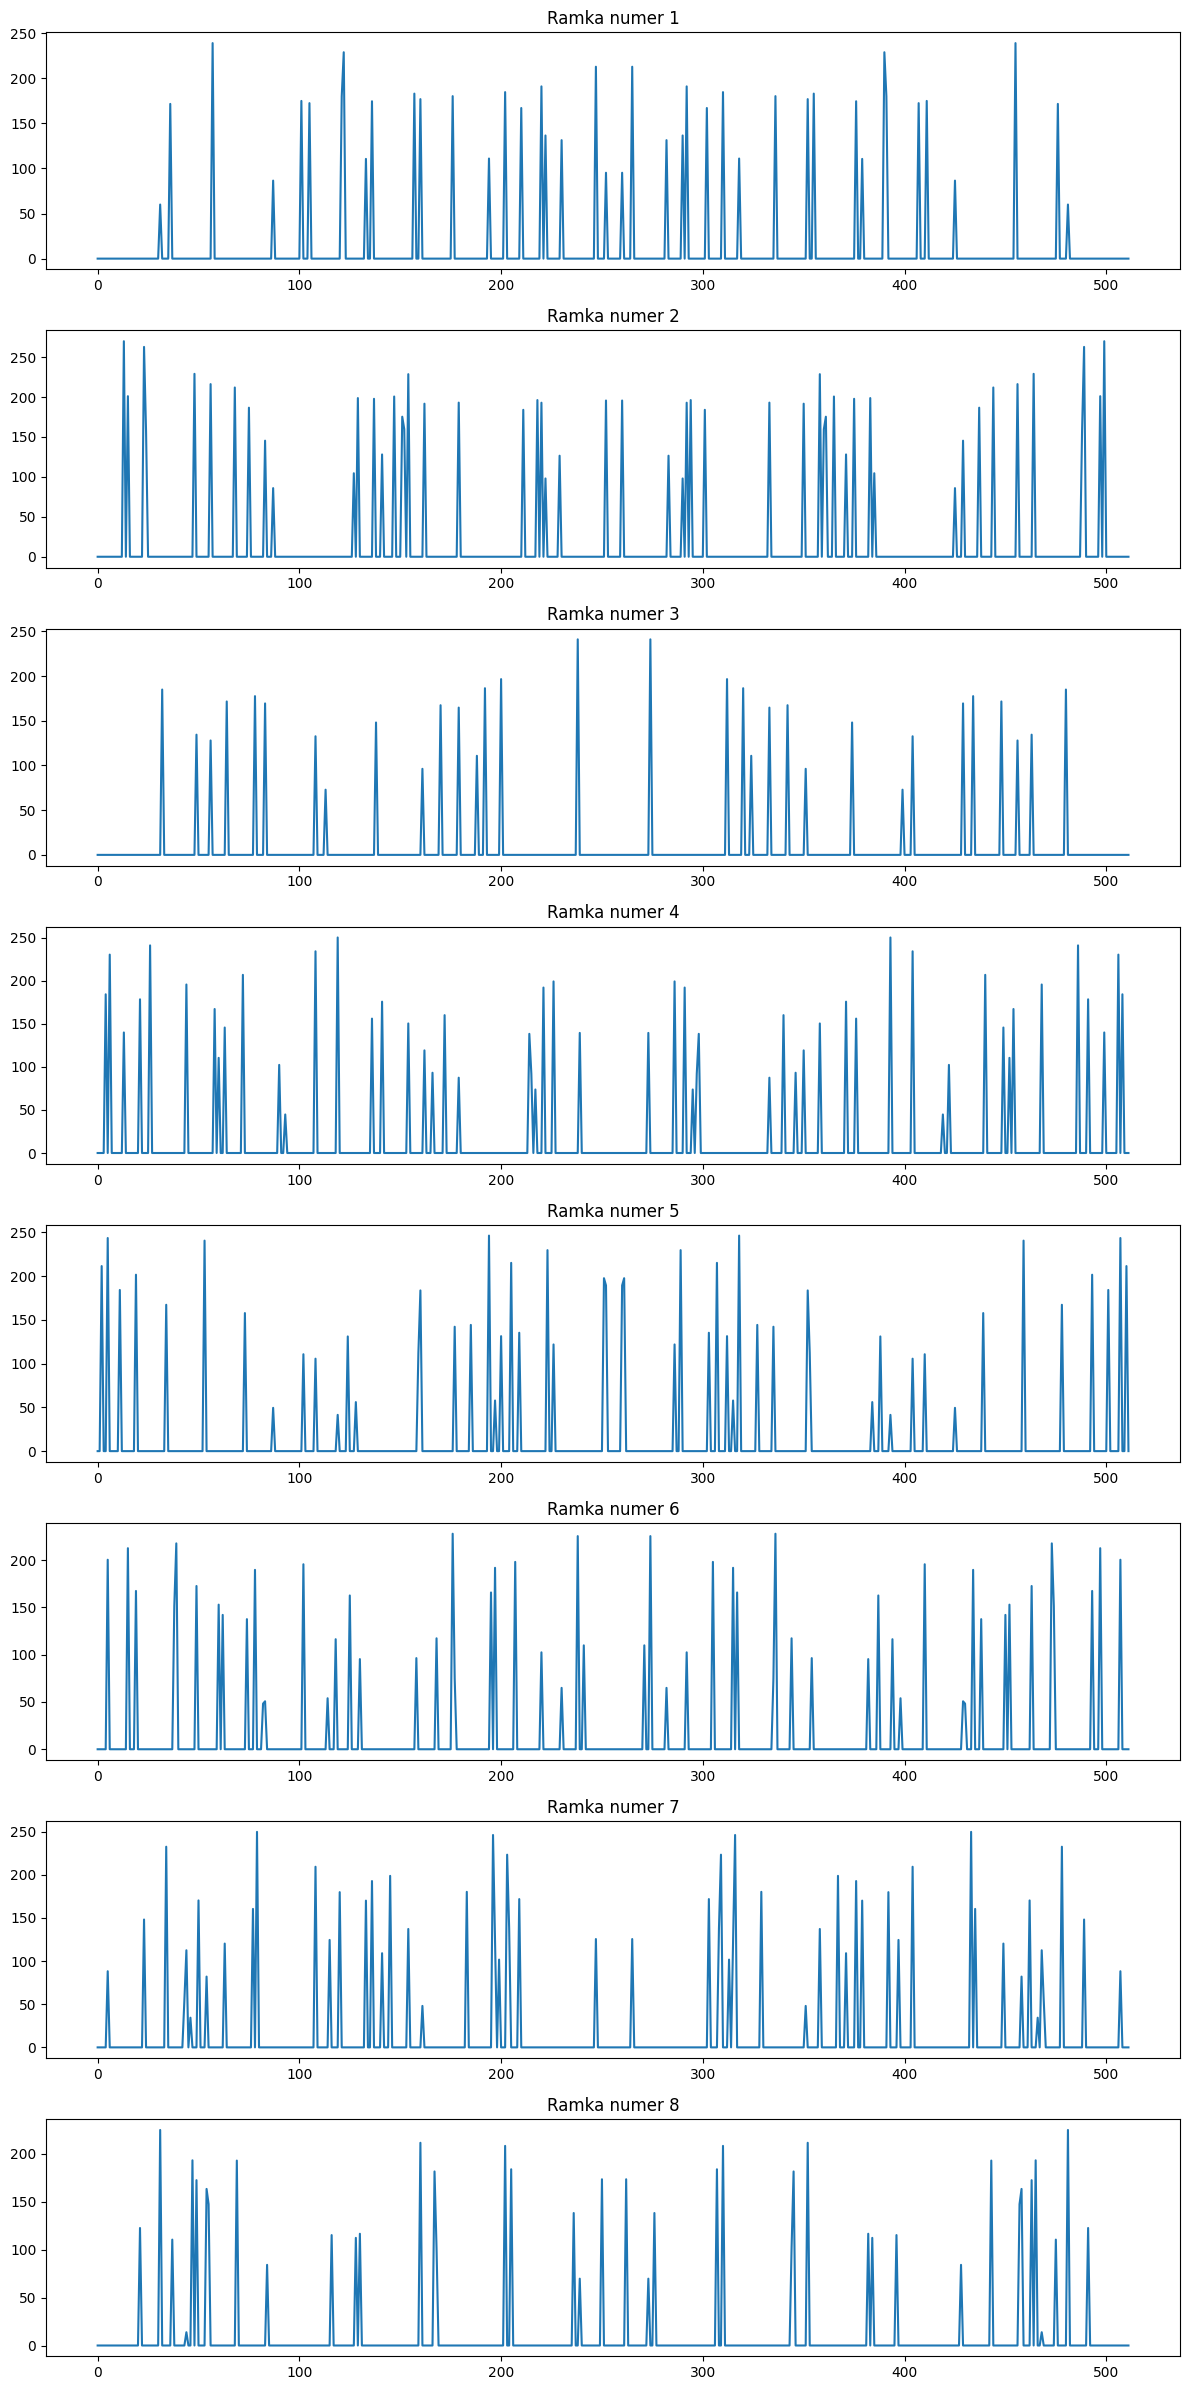

[31, 36, 57, 87, 101, 105, 121, 122, 133, 136, 157, 160, 176, 194, 202, 210, 220, 222, 230, 247, 252, 260, 265, 282, 290, 292, 302, 310, 318, 336, 352, 355, 376, 379, 390, 391, 407, 411, 425, 455, 476, 481]


In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('lab_03.mat')
vector_number = 417670 % 16 + 1

signal = mat['x_7']
signal.shape

K = 8
M = 32
N = 512
frames = []
for i in range(K):
    start = i*(N+M)+M
    end = (i+1)*(N+M)
    frames.append(signal[start:end])

# Wyznaczamy macierz A dla N=512 próbek
W_N = np.exp(1j * 2 * np.pi / N)

A = np.ones((N, N), dtype=complex) / np.sqrt(N)
for k in range(N):
    for n in range(N):
        A[k, n] = W_N ** (-k * n)

fs = 512
X_array = []
for frame in frames:
    X = A.dot(frame)
    X_array.append(X)

frequency_axis = np.linspace(0, fs, N, endpoint=False)
fig, ax = plt.subplots(8, 1, figsize=(12,24))
for i in range(K):
    magnitude = np.abs(X_array[i])
    ax[i].plot(frequency_axis, magnitude)
    ax[i].set_title("Ramka numer {}".format(i+1))
plt.tight_layout()
plt.show()

print([freq for freq, x in enumerate(np.abs(X_array[0])) if x > 1])
